# Undersampling, SMOTE, and running models

## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter

import performance_measure
import data_sampling
import split_data_set

# The three models
import decision_tree
import svm_method
import random_forest_method

Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from svm_method.ipynb
Importing Jupyter notebook from split_data_set.ipynb
Importing Jupyter notebook from decision_tree.ipynb


In [2]:
# Importing file from another folder
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
# import pandas_to_latex_test

from TE.latex_scripts.pandas_to_latex import df_to_latex

/Users/stianismar/Dropbox/gitProsjekter/project-thesis
Importing Jupyter notebook from /Users/stianismar/Dropbox/gitProsjekter/project-thesis/TE/latex_scripts/pandas_to_latex.ipynb


In [3]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

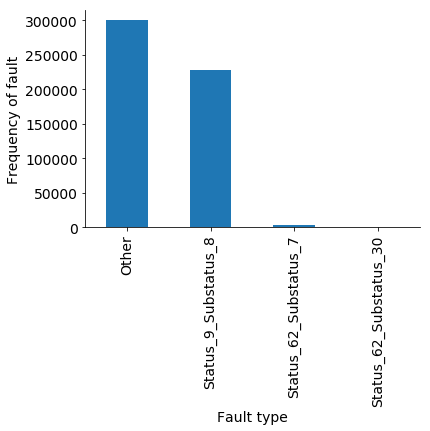

<Figure size 1440x1152 with 0 Axes>

In [4]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [5]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [6]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Status_9_Substatus_8")

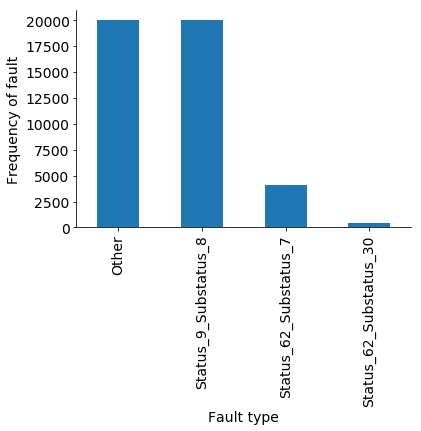

<Figure size 1440x1152 with 0 Axes>

In [7]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [8]:
undersampled_data.head()

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,16-11-2017 12:35:30,-5.2,16.1,21.219999,137.0,2367.0,24.0,42.0,24.0,11.0,...,57.0,17.0,31.0,10.0,34.0,34.0,71.0,5.44,208.100006,Other
1,25-07-2018 01:57:00,-11.5,3.5,9.849999,32.0,0.0,24.0,30.0,31.0,28.0,...,61.0,39.0,33.0,16.0,20.0,26.0,41.0,1.00,20.500000,Status_9_Substatus_8
2,15-12-2018 05:43:00,-6.4,5.0,12.139999,139.0,0.0,8.0,23.0,20.0,7.0,...,65.0,24.0,40.0,-5.0,3.0,22.0,19.0,8.17,132.600006,Status_9_Substatus_8
3,27-06-2019 13:46:00,1.9,6.4,13.700000,254.0,354.0,25.0,32.0,31.0,23.0,...,58.0,35.0,43.0,13.0,19.0,24.0,40.0,23.09,255.899994,Status_9_Substatus_8
4,11-03-2018 20:41:30,15.8,6.3,14.960000,86.0,524.0,15.0,31.0,25.0,5.0,...,43.0,21.0,48.0,-1.0,14.0,20.0,50.0,1.00,101.800003,Other


In [9]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(44481,)

In [10]:
y.value_counts()

Other                     20000
Status_9_Substatus_8      20000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

## Split into training and test

In [11]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

In [12]:
columns_for_data = X_train.columns

In [13]:
y_train.value_counts()

Status_9_Substatus_8      13400
Other                     13400
Status_62_Substatus_7      2746
Status_62_Substatus_30      256
Name: Status, dtype: int64

In [14]:
y_test.value_counts()

Status_9_Substatus_8      6600
Other                     6600
Status_62_Substatus_7     1352
Status_62_Substatus_30     127
Name: Status, dtype: int64

## Random forest and feature importance

Normalized confusion matrix
[[9.84696970e-01 1.51515152e-04 4.24242424e-03 1.09090909e-02]
 [1.33858268e-01 8.66141732e-01 0.00000000e+00 0.00000000e+00]
 [2.21893491e-03 0.00000000e+00 9.97781065e-01 0.00000000e+00]
 [1.09090909e-02 0.00000000e+00 0.00000000e+00 9.89090909e-01]]


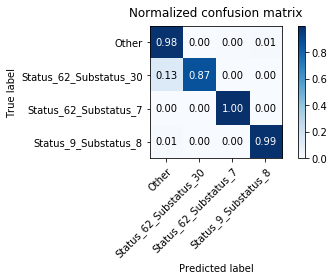

Total Accuracy 		0.987

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.986 		 0.985 		 0.985
Status_62_Substatus_30    	 0.991 		 0.866 		 0.924
Status_62_Substatus_7     	 0.980 		 0.998 		 0.989
Status_9_Substatus_8      	 0.989 		 0.989 		 0.989


In [15]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [16]:
rf.head()

,importance
ActivePower,0.162424
Log-T-Raw-TransformerTemperature,0.076333
Log-T-Raw-Rectifier1HeatSink,0.075618
Log-T-Raw-Rotor1Temperature,0.054098
Log-T-Raw-Stator1Temperature,0.042889


## Scale dataset for SVM

In [20]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.columns = columns_for_data
X_train_scaled_df.head()

(29802, 34)
(14679, 34)


,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.590178,0.084699,0.347789,0.225627,0.017062,0.684211,0.686047,0.357143,0.682353,0.690476,...,0.652174,0.674419,0.736842,0.351064,0.647059,0.578313,0.490909,0.330097,0.000000,0.492135
1,0.520965,0.139344,0.519966,0.353760,0.000000,0.578947,0.639535,0.344156,0.623529,0.619048,...,0.804348,0.860465,0.666667,0.500000,0.549020,0.518072,0.400000,0.349515,0.124286,0.536874
2,0.478748,0.125683,0.376556,0.228412,0.029130,0.592105,0.616279,0.324675,0.588235,0.607143,...,0.597826,0.651163,0.526316,0.287234,0.470588,0.493976,0.381818,0.359223,0.026948,0.414913
3,0.514360,0.295082,0.856591,0.306407,0.732002,0.578947,0.604651,0.363636,0.364706,0.404762,...,0.282609,0.232558,0.070175,0.170213,0.196078,0.481928,0.290909,0.417476,0.000000,0.497446
4,0.500000,0.030055,0.027909,0.871866,0.000000,0.565789,0.534884,0.298701,0.623529,0.619048,...,0.239130,0.279070,0.491228,0.191489,0.509804,0.506024,0.381818,0.291262,0.636197,0.901941


In [21]:
def head_row_col(dataframe):
    print_df = dataframe.head().iloc[:,[1,2,3,4,5]].copy()
    print_df["..."]="..."
    return print_df

df_to_latex(head_row_col(X_train_scaled_df))



\begin{tabular}{rrrrrl}
\toprule
 WindSpeed &  RotorSpeed &  NacelleDirection &  ActivePower &  Spinner-Temperature &  ... \\
\midrule
  0.084699 &    0.347789 &          0.225627 &     0.017062 &             0.684211 &  ... \\
  0.139344 &    0.519966 &          0.353760 &     0.000000 &             0.578947 &  ... \\
  0.125683 &    0.376556 &          0.228412 &     0.029130 &             0.592105 &  ... \\
  0.295082 &    0.856591 &          0.306407 &     0.732002 &             0.578947 &  ... \\
  0.030055 &    0.027909 &          0.871866 &     0.000000 &             0.565789 &  ... \\
\bottomrule
\end{tabular}



## SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)


X_test_scaled_smote ,y_test_smote = sm.fit_resample(X_test_scaled, y_test)

## SVM method

### BALANCED SVM

In [ ]:
# Balanced
svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED SVM

In [ ]:
# Unbalanced
svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### SMOTE and unbalanced weights (USE THIS RESULT Best results for 62_30)!

In [ ]:
svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and class_weight balanced

In [ ]:
print(X_train_scaled_smote.shape)
print(y_train.shape)
print(X_test_scaled_smote.shape)
print(y_test.shape)

In [ ]:
# balanced with smote and undersampling
svm4 = svm_method.get_svm_model_balanced(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

## Decision tree model

### Remove the features from the random forest model called rf


In [28]:
rf_df = pd.DataFrame(rf)
rf_df_extracted = rf_df.head(6)
rf_df_extracted.reset_index()
include_features = rf_df_extracted.index
list_of_features = include_features.tolist()

# The selected features in a list
df_selected_features = pd.DataFrame(list_of_features)
df_selected_features.columns = ['Selected features for decision tree']
df_selected_features
df_to_latex(df_selected_features)


\begin{tabular}{l}
\toprule
Selected features for decision tree \\
\midrule
                        ActivePower \\
   Log-T-Raw-TransformerTemperature \\
       Log-T-Raw-Rectifier1HeatSink \\
        Log-T-Raw-Rotor1Temperature \\
       Log-T-Raw-Stator1Temperature \\
       Log-T-Raw-Stator2Temperature \\
\bottomrule
\end{tabular}



In [ ]:
shorter_feature_names = []
for i, s in enumerate(list_of_features):
    split = s.split("Log-T-Raw-")
    print(split)
    if (len(split)>1):
        shorter_feature_names.append(split[1])
    else:
        shorter_feature_names.append(split[0])

    
shorter_feature_names

In [ ]:
import numpy as np

X_train_scaled_with_names = (pd.DataFrame(X_train_scaled_smote))
X_train_scaled_with_names.columns = columns_for_data

X_test_scaled_with_names = (pd.DataFrame(X_test_scaled_smote))
X_test_scaled_with_names.columns = columns_for_data

# data = X_train_scaled_with_names[np.intersect1d(X_train_scaled_with_names, list_of_features)]

# Only including the features in from the Random Forest feature imporances
X_train_scaled_removed = X_train_scaled_with_names[include_features.tolist()]
X_test_scaled_removed = X_test_scaled_with_names[include_features.tolist()]

# Printing df
X_test_scaled_removed.head()




In [ ]:
col_rename_dict = {i:j for i,j in zip(X_test_scaled_removed.columns,shorter_feature_names)}
X_test_scaled_removed.rename(columns=col_rename_dict, inplace=True)

# X_test_scaled_removed.rename(columns={include_features : shorter_feature_names})
X_test_scaled_removed.head()
                

In [ ]:
# Train DT on these features and print it out:
dt_depth3 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,3)
dt_depth2 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,2)

In [ ]:
# Print the tree
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

def save_tree(dt,name):
    dot_data = tree.export_graphviz(dt,
                                    feature_names=X_test_scaled_removed.columns,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('powderblue', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])

    # Exporting image to current directory
    graph.write_png('../Data_Plots/decision_trees/{}.png'.format(name))

In [ ]:
save_tree(dt_depth2,"depth2")
save_tree(dt_depth3,"depth3")